<a href="https://colab.research.google.com/github/alpopfares25/Bike-Rentals-Prediction/blob/main/Bike_Rental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Dataset link : https://www.kaggle.com/c/bike-sharing-demand/

# Import Libraries

In [ ]:
%matplotlib inline


In [ ]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
#from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor





from pandas_profiling import ProfileReport

import seaborn as sns #for visualization

In [ ]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

#Read Data

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/bikes.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#Data Fields


*   datetime - hourly date + timestamp  


*   season -  1 = spring, 2 = summer, 3 = fall, 4 = winter


*   holiday - whether the day is considered a holiday

*   workingday - whether the day is neither a weekend nor holiday

*   weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
*   temp - temperature in Celsius



*   humidity - relative humidity



*   windspeed - wind speed


*   casual - number of non-registered user rentals initiated


*   registered - number of registered user rentals initiated

*   count - number of total rentals







#1- EDA and Visualization

##First overview tha dataset then starting EDA

In [ ]:
#profile = ProfileReport(df, title="Pandas Profiling Report",minimal=True)
#profile


###EDA (Exploratory Data Analysis)

#### 1- Distribuation of rentals bikes count per hour

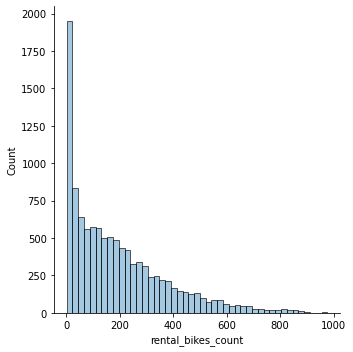

In [ ]:
df.rename(columns = {'count':'rental_bikes_count'}, inplace = True)
sns.displot(df, x="rental_bikes_count", alpha=.4, rug=False)

In [ ]:
df['rental_bikes_count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: rental_bikes_count, dtype: float64

#### from the describtion I found that there is a an hour/s in a day has maximum rentals is 977 and another hour/s in a day has minimum rentals is 1 I will extract them

In [ ]:
df[df['rental_bikes_count']==df['rental_bikes_count'].max()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rental_bikes_count
9345,2012-09-12 18:00:00,3,0,1,1,27.06,31.06,44,16.9979,91,886,977


In [ ]:
df[df['rental_bikes_count']==df['rental_bikes_count'].min()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rental_bikes_count
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
30,2011-01-02 07:00:00,1,0,0,2,16.40,20.455,76,12.9980,0,1,1
49,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1
71,2011-01-04 02:00:00,1,0,1,1,5.74,7.575,63,8.9981,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6884,2012-04-05 04:00:00,2,0,1,1,15.58,19.695,43,19.0012,0,1,1
7051,2012-04-12 04:00:00,2,0,1,1,12.30,14.395,61,15.0013,0,1,1
7433,2012-05-09 02:00:00,2,0,1,3,22.96,26.515,88,30.0026,0,1,1
10288,2012-11-14 02:00:00,4,0,1,1,9.84,10.605,60,19.9995,0,1,1


#### 2- Rentals each day per week (remember each row in a dataset represent rental per hour)

In [ ]:
#first the feature datatime I want to split it into year&days&hours

df['datetime']=pd.to_datetime(df['datetime'],format='%Y-%m-%d %H:%M:%S',errors='coerce')
df['year']=df['datetime'].dt.year
df['month']=df['datetime'].dt.month_name()
df['day']=df['datetime'].dt.day_name()
df['hour']=df['datetime'].dt.hour

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rental_bikes_count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,January,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,January,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,January,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,January,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,January,Saturday,4


In [ ]:
df.groupby('day').describe()['rental_bikes_count'].transpose()

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,1529.000000,1551.000000,1584.000000,1579.000000,1553.000000,1539.000000,1551.000000
mean,197.844343,190.390716,196.665404,180.839772,197.296201,189.723847,188.411348
std,172.518208,180.943376,180.917795,167.022145,187.606619,186.719673,190.942004
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,52.000000,39.000000,45.000000,43.000000,44.000000,36.000000,38.000000
50%,167.000000,146.000000,141.500000,119.000000,155.000000,146.000000,136.000000
75%,290.000000,277.500000,309.500000,298.000000,280.000000,274.000000,270.500000
max,900.000000,968.000000,783.000000,757.000000,901.000000,970.000000,977.000000


#### 3- which season has more rentals bikes

In [ ]:
df.groupby('season').describe()['rental_bikes_count'].transpose()

season,1,2,3,4
count,2686.000000,2733.000000,2733.000000,2734.000000
mean,116.343261,215.251372,234.417124,198.988296
std,125.273974,192.007843,197.151001,177.622409
min,1.000000,1.000000,1.000000,1.000000
25%,24.000000,49.000000,68.000000,51.000000
50%,78.000000,172.000000,195.000000,161.000000
75%,164.000000,321.000000,347.000000,294.000000
max,801.000000,873.000000,977.000000,948.000000


#### 4- which weather has more rentaled bikes

In [ ]:
df.groupby('weather').describe()['rental_bikes_count'].transpose()

weather,1,2,3,4
count,7192.000000,2834.000000,859.000000,1.0
mean,205.236791,178.955540,118.846333,164.0
std,187.959566,168.366413,138.581297,NaN
min,1.000000,1.000000,1.000000,164.0
25%,48.000000,41.000000,23.000000,164.0
50%,161.000000,134.000000,71.000000,164.0
75%,305.000000,264.000000,161.000000,164.0
max,977.000000,890.000000,891.000000,164.0


#### 5- Correlation between rental bikes count with all features

In [ ]:
df.corr()[['rental_bikes_count']]

,rental_bikes_count
season,0.163439
holiday,-0.005393
workingday,0.011594
weather,-0.128655
temp,0.394454
atemp,0.389784
humidity,-0.317371
windspeed,0.101369
casual,0.690414
registered,0.970948


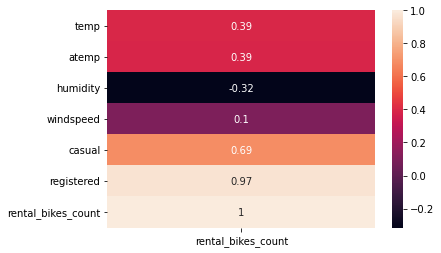

In [ ]:
df_n=df.drop(['year','hour','holiday','season','weather','workingday'],axis=1)
sns.heatmap(df_n.corr()[['rental_bikes_count']],annot=True)

#### 6- Rentals during rush hours (7-9 am & 3-5 pm)

In [ ]:
def is_rush_hour(hour):
    return 1 if hour in [7,8,9,15,16,17] else 0
df['is_rush_hours']=df['hour'].apply(is_rush_hour)
df.groupby('is_rush_hours').describe()['rental_bikes_count'].transpose()

is_rush_hours,0,1
count,8153.000000,2733.000000
mean,153.140562,306.227955
std,158.808647,194.740685
min,1.000000,1.000000
25%,26.000000,157.000000
50%,108.000000,276.000000
75%,225.000000,420.000000
max,977.000000,970.000000


#### 7- Rentals in school days which be from 9:1 and 2:5 monthes

In [ ]:
def check_school_day(day):
    return 1 if day in ['September', 'October', 'November', 'December','January', 'February', 'March', 'April', 'May'] else 0
df['is_school_day']=df['month'].apply(check_school_day)


In [ ]:
df.groupby('is_school_day').describe()['rental_bikes_count'].transpose()

is_school_day,0,1
count,2736.000000,8150.000000
mean,237.158626,176.271166
std,193.962950,173.987590
min,1.000000,1.000000
25%,72.750000,37.000000
50%,203.000000,126.000000
75%,351.250000,258.000000
max,897.000000,977.000000


###Data Visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Season')

<Figure size 1440x1152 with 0 Axes>

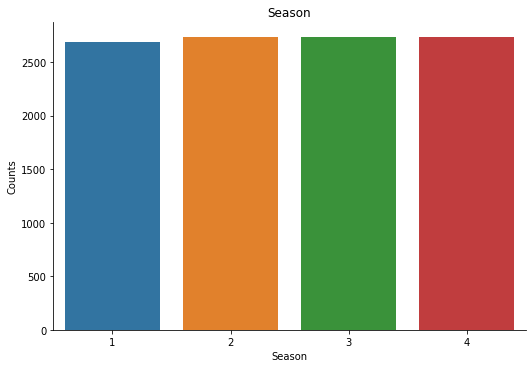

In [ ]:
#univariant Season
# 1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter"
plt.figure(figsize=(20,16))
sns.factorplot(x ='season',data=df,kind="count",size=5,aspect=1.5)
plt.xlabel("Season")
plt.ylabel("Counts")
plt.title("Season")


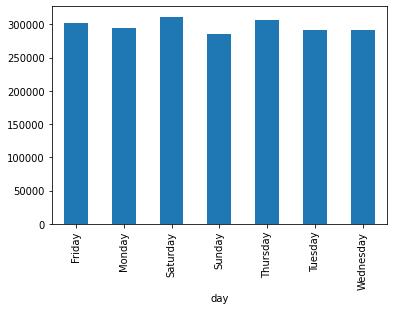

In [ ]:
#day (number or rental bikes per day)

df.groupby(['day'])["rental_bikes_count"].sum().plot.bar()

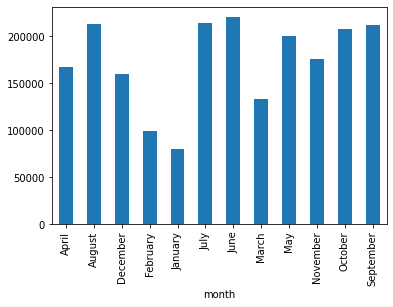

In [ ]:
#month (number or rental bikes per month)

df.groupby(['month'])["rental_bikes_count"].sum().plot.bar()

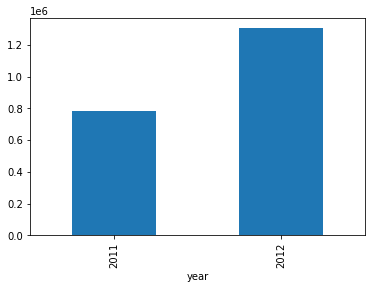

In [ ]:
#year (number or rental bikes per year)

df.groupby(['year'])["rental_bikes_count"].sum().plot.bar()

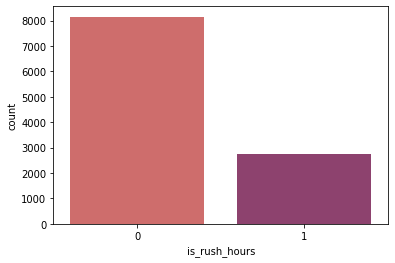

In [ ]:
# (number or rental bikes in rush hours)

sns.countplot(x="is_rush_hours",data=df,palette='flare')

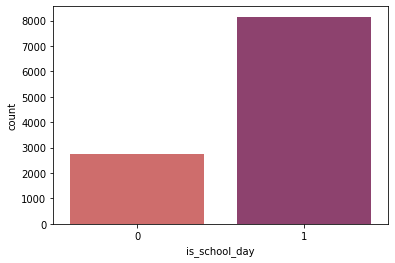

In [ ]:
# (number or rental bikes in school days)

sns.countplot(x="is_school_day",data=df,palette='flare')

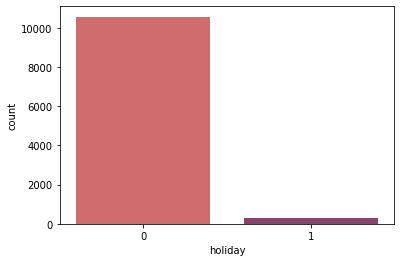

In [ ]:
# (number or rental bikes in holidays)

sns.countplot(x="holiday",data=df,palette='flare')

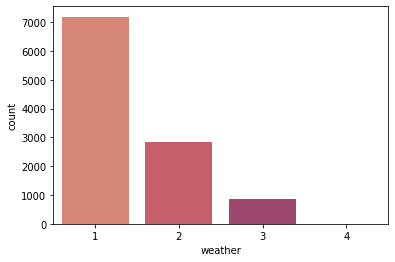

In [ ]:
#(number or rental bikes in holidays)
# 1-clear  2-mist  3-rainy  4-snowy
sns.countplot(x="weather",data=df,palette='flare')

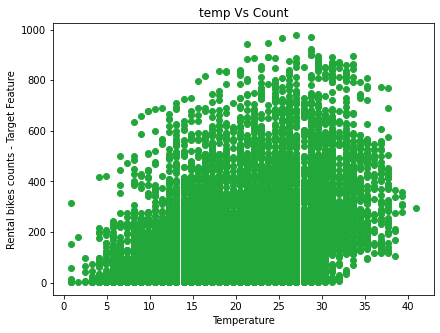

In [ ]:
#correlation between temp and rental bikes count

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(x =df['temp'],y=df["rental_bikes_count"],color="#22a73a")

plt.xlabel("Temperature")
plt.ylabel("Rental bikes counts - Target Feature")
plt.title("temp Vs Count")

plt.show()

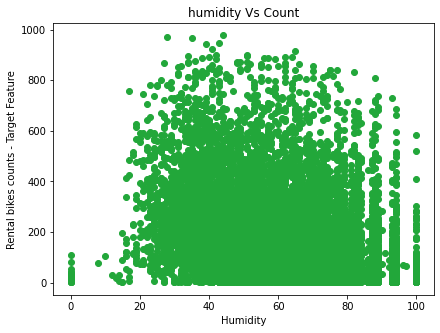

In [ ]:
#correlation between humidity and rental bikes count

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(x =df['humidity'],y=df["rental_bikes_count"],color="#22a73a")

plt.xlabel("Humidity")
plt.ylabel("Rental bikes counts - Target Feature")
plt.title("humidity Vs Count")

plt.show()

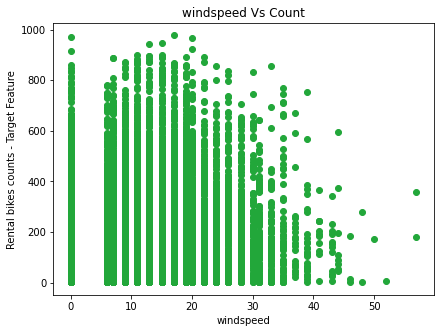

In [ ]:
#correlation between windspeed and rental bikes count

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(x =df['windspeed'],y=df["rental_bikes_count"],color="#22a73a")

plt.xlabel("windspeed")
plt.ylabel("Rental bikes counts - Target Feature")
plt.title("windspeed Vs Count")

plt.show()

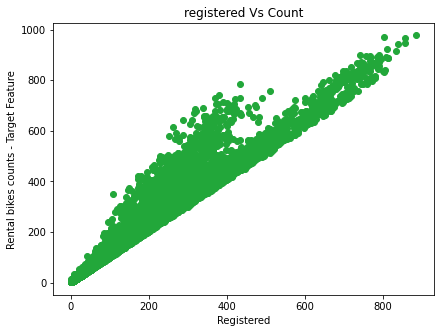

In [ ]:
#correlation between registered and rental bikes count

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(x =df['registered'],y=df["rental_bikes_count"],color="#22a73a")

plt.xlabel("Registered")
plt.ylabel("Rental bikes counts - Target Feature")
plt.title("registered Vs Count")

plt.show()

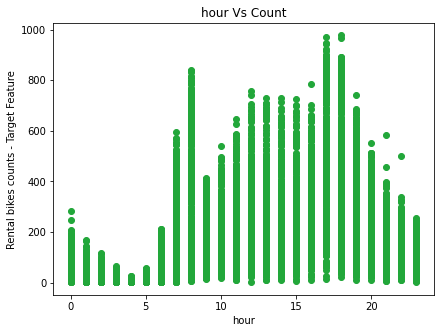

In [ ]:
#correlation between hour and rental bikes count

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(x =df['hour'],y=df["rental_bikes_count"],color="#22a73a")

plt.xlabel("hour")
plt.ylabel("Rental bikes counts - Target Feature")
plt.title("hour Vs Count")

plt.show()

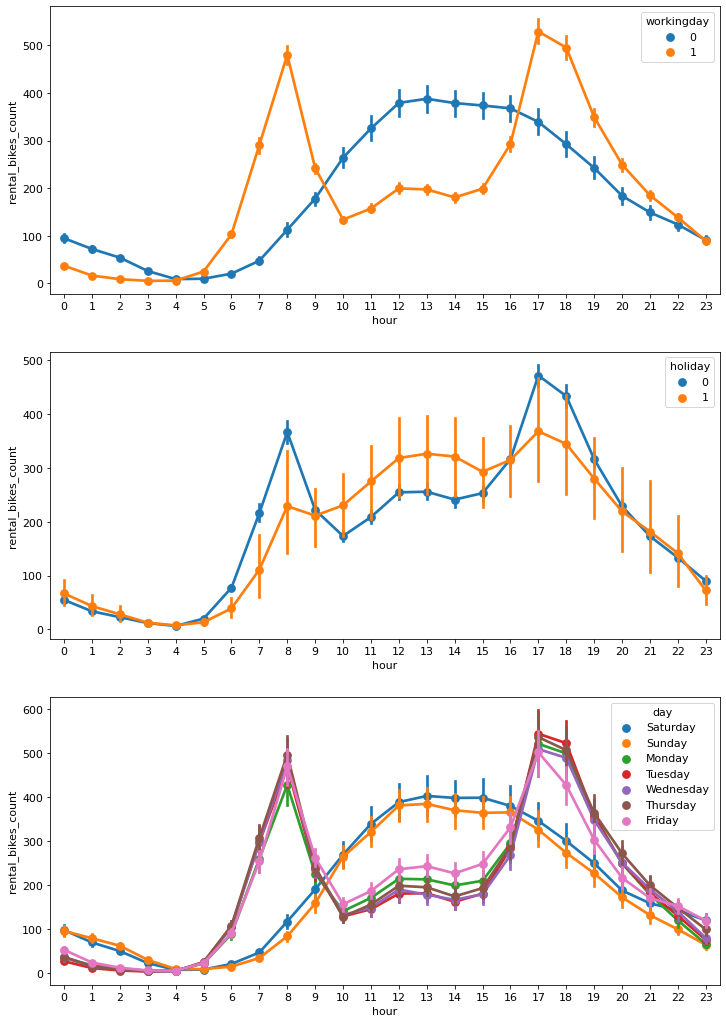

In [ ]:
plt.rc('font', size=11)
figure, axes = plt.subplots(nrows=3)
figure.set_size_inches(12,18)
sns.pointplot(x='hour', y='rental_bikes_count', data=df, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='rental_bikes_count', data=df, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='rental_bikes_count', data=df, hue='day', ax=axes[2])


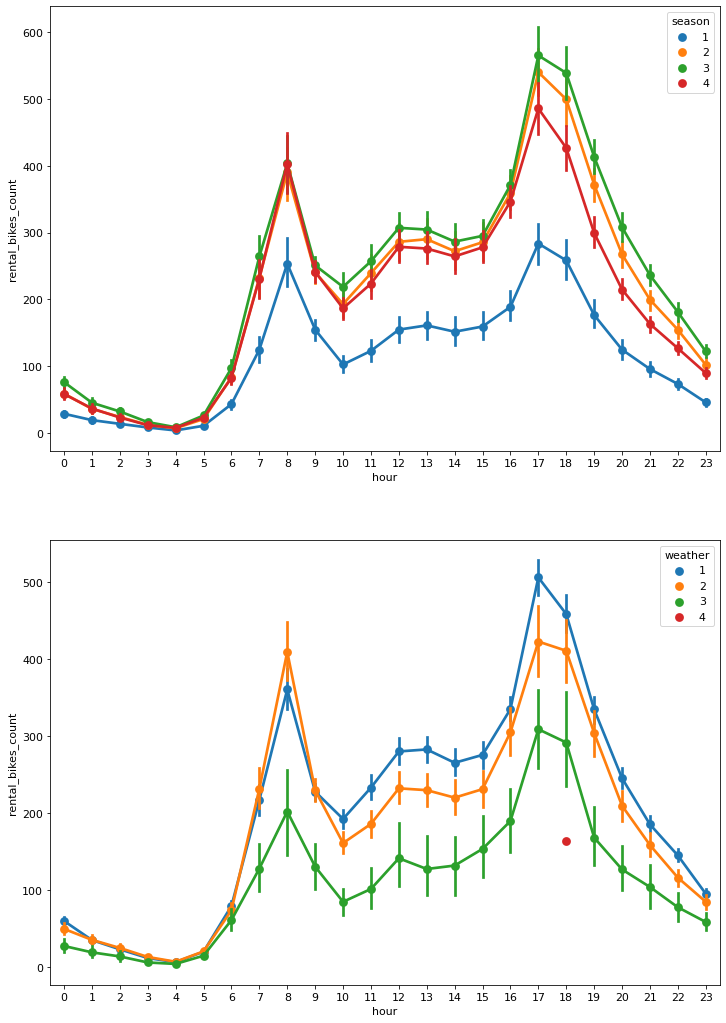

In [ ]:
plt.rc('font', size=11)
figure, axes = plt.subplots(nrows=2)
figure.set_size_inches(12,18)
sns.pointplot(x='hour', y='rental_bikes_count', data=df, hue='season', ax=axes[0])
sns.pointplot(x='hour', y='rental_bikes_count', data=df, hue='weather', ax=axes[1])


In [ ]:
#rentals of each day in all monthes
new_df=pd.pivot_table(data=df,values='rental_bikes_count',columns='day',index='month')
new_df

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,164.016667,195.654930,165.158333,196.041667,206.991667,183.430556,173.403361
August,236.340278,223.550000,245.266667,201.350000,245.312500,235.241667,246.590278
December,181.300000,184.118056,176.131944,141.125000,180.541667,198.175000,173.000000
February,131.326241,114.010526,93.270833,87.201681,113.795775,110.186441,118.281690
January,108.968085,73.014184,85.050000,75.923077,114.899160,96.669291,88.092857
July,238.716667,237.590278,234.891667,215.736111,249.616667,230.555556,244.591667
June,237.986111,236.075000,269.076389,245.326389,229.225000,237.683333,233.591667
March,135.922535,158.491525,162.125000,147.418803,152.225352,133.134454,146.596639
May,247.316667,181.975000,256.075000,205.950000,237.840278,208.055556,201.250000


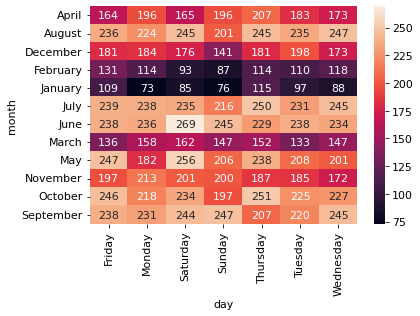

In [ ]:
sns.heatmap(new_df,annot=True,fmt='0.0f')

#2- Data Preprocessing


*   data cleaning

*   working with missing data

*   working with cateogrical data
*   detect and handle outliers


*   split data into train and test


*   feature scaling



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10886 non-null  int64         
 2   holiday             10886 non-null  int64         
 3   workingday          10886 non-null  int64         
 4   weather             10886 non-null  int64         
 5   temp                10886 non-null  float64       
 6   atemp               10886 non-null  float64       
 7   humidity            10886 non-null  int64         
 8   windspeed           10886 non-null  float64       
 9   casual              10886 non-null  int64         
 10  registered          10886 non-null  int64         
 11  rental_bikes_count  10886 non-null  int64         
 12  year                10886 non-null  int64         
 13  month               10886 non-null  object    

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rental_bikes_count,year,hour,is_rush_hours,is_school_day
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,11.541613,0.251056,0.748668
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,6.915838,0.433641,0.433799
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,6.000000,0.000000,0.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,12.000000,0.000000,1.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,18.000000,1.000000,1.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,23.000000,1.000000,1.000000


In [ ]:
# data cleaning


#check numeric columns has numeric values
for col in['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'rental_bikes_count'] :
       df[col]=pd.to_numeric(df[col],errors='coerce')

#check the categorical columns values
for col in['month', 'day'] :
       print(df[col].unique()) #there is no nan

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']


In [ ]:
# working with missing data

df.isna().sum() #no missing fine



datetime              0
season                0
holiday               0
workingday            0
weather               0
temp                  0
atemp                 0
humidity              0
windspeed             0
casual                0
registered            0
rental_bikes_count    0
year                  0
month                 0
day                   0
hour                  0
is_rush_hours         0
is_school_day         0
dtype: int64

In [ ]:
# working with cateogrical data

#df=pd.get_dummies(df,columns=['season','weather','day'],drop_first=True)


df['datetime']=pd.to_datetime(df['datetime'],format='%Y-%m-%d %H:%M:%S',errors='coerce')
df['month']=df['datetime'].dt.month
df['day']=df['datetime'].dt.day

df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rental_bikes_count,year,month,day,hour,is_rush_hours,is_school_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,1


In [ ]:
# detect and handle outliers


In [ ]:
# split data into train and test
df.drop(['datetime','atemp','windspeed'],axis=1,inplace=True)
y=df['rental_bikes_count']
X=df.drop(['rental_bikes_count'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'casual', 'registered', 'year', 'month', 'day', 'hour', 'is_rush_hours',
       'is_school_day'],
      dtype='object')

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

#3- Model Optimization

In [ ]:

models={
    'LR': LogisticRegression(),
    'KNNR':KNeighborsRegressor(),
    'SVR':SVR(),
    'DT':DecisionTreeRegressor(),
    'RF':RandomForestRegressor(),
    'XGBR':XGBRegressor()
}

In [ ]:
for name,model in models.items():
  print(f'Using model:{name}')
  model.fit(x_train,y_train)
  train_score=model.score(x_train,y_train)
  test_score=model.score(x_test,y_test)
  print(f'Training score:{model.score(x_train,y_train)}')
  print(f'Testing score:{model.score(x_test,y_test)}')
  print("***************************************")


Using model:LR


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Training score:0.06706476802939826
Testing score:0.024793388429752067
***************************************
Using model:KNNR
Training score:0.97052950153387
Testing score:0.9558100343807708
***************************************
Using model:SVR
Training score:0.8510524819779784
Testing score:0.8541404524538467
***************************************
Using model:DT
Training score:1.0
Testing score:0.9988646332708907
***************************************
Using model:RF
Training score:0.999953745296779
Testing score:0.9996934964491578
***************************************
Using model:XGBR
[23:57:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training score:0.9992862774552707
Testing score:0.999017632958525
***************************************


#5- Model Evaluation

MAE :   2.9807162534435263
MSE :   37.1505968778696
RMSE :   6.095128946779519


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predicted  rentals ')

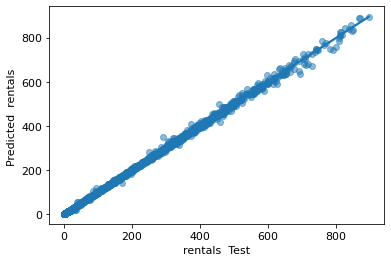

In [ ]:
from sklearn import metrics
#choose the best model
Bike_model=DecisionTreeRegressor()
Bike_model.fit(x_train,y_train)
y_pred=Bike_model.predict(x_test)
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
sns.regplot(y_test,y_pred,scatter_kws={'alpha':0.5})
plt.xlabel('rentals  Test')
plt.ylabel('Predicted  rentals ')

#6- Saving the best model and testing on real data

In [ ]:
import joblib
import os
os.chdir('/content/drive/MyDrive')
joblib.dump(Bike_model,'Bike_model.h5')
joblib.dump(scaler,'scaler.h5')





#cwd = os.getcwd()  # Get the current working directory (cwd)
#files = os.listdir(cwd)  # Get all the files in that directory
#print("Files in %r: %s" % (cwd, files))

['Bike_model.h5']

['scaler.h5']

In [ ]:
X.columns
len(X.columns)

14

In [ ]:
test_data=[1,0,0,1,9.02,80,5,27,2011,1,1,2,0,1]
len(test_data)

14

In [ ]:
test_data=scaler.transform([test_data])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
Bike_model.predict(test_data)

array([32.])

In [ ]:
df

,season,holiday,workingday,weather,temp,humidity,casual,registered,rental_bikes_count,year,month,day,hour,is_rush_hours,is_school_day
0,1,0,0,1,9.84,81,3,13,16,2011,1,1,0,0,1
1,1,0,0,1,9.02,80,8,32,40,2011,1,1,1,0,1
2,1,0,0,1,9.02,80,5,27,32,2011,1,1,2,0,1
3,1,0,0,1,9.84,75,3,10,13,2011,1,1,3,0,1
4,1,0,0,1,9.84,75,0,1,1,2011,1,1,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,50,7,329,336,2012,12,19,19,0,1
10882,4,0,1,1,14.76,57,10,231,241,2012,12,19,20,0,1
10883,4,0,1,1,13.94,61,4,164,168,2012,12,19,21,0,1
10884,4,0,1,1,13.94,61,12,117,129,2012,12,19,22,0,1


##7- Deployment ---> Web App


